In [1]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_csv(r'D:\Data_Science\DATASET\titanic\train.csv',index_col=False)

In [12]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [69]:
df.count()/len(df)

PassengerId    1.0
Survived       1.0
Pclass         1.0
Sex            1.0
Age            1.0
SibSp          1.0
Parch          1.0
Fare           1.0
Embarked       1.0
dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df.drop(['Name','Cabin','Ticket'],inplace=True,axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [23]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarked 填补众数
### Age 填补均值
### Sex\Embarked  做woe   

In [61]:
df['Embarked'].fillna(value=df['Embarked'].mode()[0],inplace=True)

In [60]:
df['Embarked'].mode()[0]

'S'

In [54]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
df[df['Embarked'].isnull()]['Embarked']

Series([], Name: Embarked, dtype: object)

In [68]:
df['Age'].fillna(value=int(df['Age'].mean()),inplace=True)

In [67]:
int(df['Age'].mean())

29

### 字符变量做woe转换

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [73]:
from category_encoders import WOEEncoder

In [74]:
X=df[['Sex','Embarked']]
y=df['Survived']

In [75]:
woe=WOEEncoder(cols=['Sex','Embarked']).fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [78]:
df_numberic=woe.transform(X)

In [80]:
df[['Sex','Embarked']]=df_numberic

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    float64
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [92]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,-0.979029,22.0,1,0,7.2500,-0.194402
1,2,1,1.519695,38.0,1,0,71.2833,0.683655
2,3,3,1.519695,26.0,0,0,7.9250,-0.194402
3,4,1,1.519695,35.0,1,0,53.1000,-0.194402
4,5,3,-0.979029,35.0,0,0,8.0500,-0.194402
...,...,...,...,...,...,...,...,...
886,887,2,-0.979029,27.0,0,0,13.0000,-0.194402
887,888,1,1.519695,19.0,0,0,30.0000,-0.194402
888,889,3,1.519695,29.0,1,2,23.4500,-0.194402
889,890,1,-0.979029,26.0,0,0,30.0000,0.683655


### 开始计算变量重要性

### 方法1：f检验（方差分析）

In [83]:
y=df['Survived']

In [93]:
X=df

In [90]:
X

In [94]:
from sklearn.feature_selection import f_classif

f = pd.Series(f_classif(X, y)[0], index = X.columns)
fimpo = f / f.sum() * 100

In [95]:
fimpo

PassengerId     0.003788
Pclass         19.551619
Sex            63.297002
Age             0.698083
SibSp           0.188762
Parch           1.013597
Fare           10.713204
Embarked        4.533946
dtype: float64

### 方法2：互信息法，最大信息系数

In [101]:
from minepy import MINE

In [103]:
def get_mic(X, y):
    mine = MINE()
    mine.compute_score(X, y)
    return mine.mic()
f = X.apply(lambda X: get_mic(X, y))
fimpo = f / f.sum() * 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
fimpo

PassengerId    15.992704
Pclass          9.986481
Sex            25.929039
Age            10.232940
SibSp           3.986718
Parch           2.812637
Fare           28.613313
Embarked        2.446168
dtype: float64

### 方法3：Predictive Power Score

In [118]:
df=pd.concat([X, y], axis = 1)

In [123]:
import ppscore
f = ppscore.predictors(df,'Survived').set_index('x')['ppscore']
fimpo = f / f.sum() * 100

In [124]:
fimpo

x
Sex            59.663678
Fare           40.336322
PassengerId     0.000000
Pclass          0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Embarked        0.000000
Name: ppscore, dtype: float64

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
cols=[i for i in df.columns if i !='PassengerId']

In [151]:
matrix_df = ppscore.matrix(df[cols])[['x', 'y', 'ppscore']].pivot(columns='y', index='x', values='ppscore')

In [152]:
matrix_df

y,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
x,,,,,,,,
Age,1.000000,0.000000,0.000000,0.000000,0.013072,0.000000,0.000000,0.000000
Embarked,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fare,0.000000,0.572566,1.000000,0.208932,0.895931,0.000000,0.372755,0.087345
Parch,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Pclass,0.000000,0.000000,0.194979,0.000000,1.000000,0.000000,0.000000,0.000000
Sex,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.129196
SibSp,0.010605,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Survived,0.000000,0.000000,0.000000,0.000000,0.014171,0.087225,0.000000,1.000000


<AxesSubplot:xlabel='y', ylabel='x'>

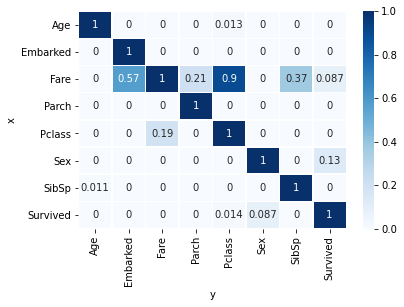

In [153]:
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

### 方法4：不纯度减少

In [154]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X, y)
fimpo = pd.Series(rf.feature_importances_ * 100, index = X.columns)

In [155]:
fimpo

PassengerId    20.891774
Pclass          8.146450
Sex            23.318068
Age            16.569874
SibSp           4.141608
Parch           3.253102
Fare           20.507243
Embarked        3.171881
dtype: float64

### 方法 5：不纯度减少 

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X, y)
fimpo = pd.Series(rf.feature_importances_ * 100, index = X.columns)

In [161]:
fimpo

PassengerId    20.165864
Pclass          8.035926
Sex            24.831997
Age            17.070053
SibSp           4.360341
Parch           2.986195
Fare           19.498055
Embarked        3.051569
dtype: float64

### split count
Another approach, described here, is simply to count the number of times a feature has been used to split across all the trees. Intuitively, a feature that has been used 10 times is twice as important as a feature that has been used only 5 times.

In [162]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X, y)
f = pd.Series(xgb.get_booster().get_score(importance_type='weight'))
fimpo = f / f.sum() * 100

[16:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [163]:
fimpo

Sex             3.353164
Age            20.551650
SibSp           2.271498
Fare           26.392645
PassengerId    39.156301
Pclass          3.136831
Embarked        2.866414
Parch           2.271498
dtype: float64

- Coverage
- Counting the number of splits may be misleading. For instance, some splits may concern just few observations, so they are not actually that relevant. 
- To overcome this issue, one can weight each split by its coverage, that is the number of observations affected by the split.

In [165]:
from xgboost import XGBClassifier
f = pd.Series(xgb.get_booster().get_score(importance_type='cover'))
fimpo = f / f.sum() * 100

In [166]:
fimpo

Sex            27.877720
Age            10.028820
SibSp          11.705546
Fare           10.046190
PassengerId     8.590593
Pclass         13.838845
Embarked       13.126745
Parch           4.785541
dtype: float64

### 排列重要性：Permutation Importance

In [173]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(X, y)
f = permutation_importance(model, X, y,n_repeats=200)['importances_mean']
fimpo = f / f.sum() * 100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  


In [174]:
fimpo

array([ 1.20100656,  9.83872198, 75.21160592,  5.24058258,  4.69345737,
        1.66425194,  0.66150679,  1.48886686])

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,-0.979029,22.0,1,0,7.2500,-0.194402
1,2,1,1.519695,38.0,1,0,71.2833,0.683655
2,3,3,1.519695,26.0,0,0,7.9250,-0.194402
3,4,1,1.519695,35.0,1,0,53.1000,-0.194402
4,5,3,-0.979029,35.0,0,0,8.0500,-0.194402
...,...,...,...,...,...,...,...,...
886,887,2,-0.979029,27.0,0,0,13.0000,-0.194402
887,888,1,1.519695,19.0,0,0,30.0000,-0.194402
888,889,3,1.519695,29.0,1,2,23.4500,-0.194402
889,890,1,-0.979029,26.0,0,0,30.0000,0.683655


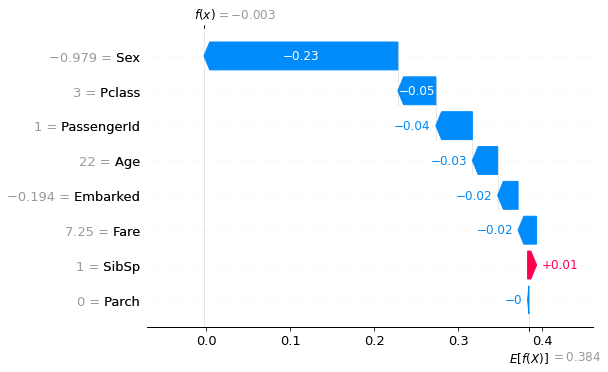

In [207]:
import shap
import xgboost
from sklearn.ensemble import RandomForestClassifier
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [213]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [214]:
# visualize all the training set predictions
shap.plots.force(shap_values)

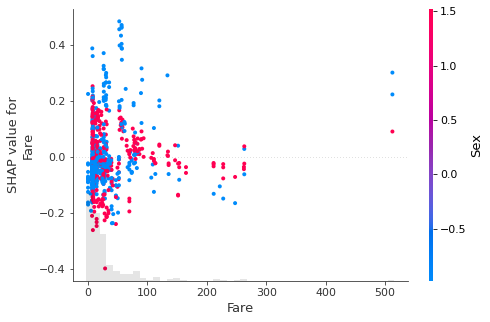

In [221]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Fare"], color=shap_values)

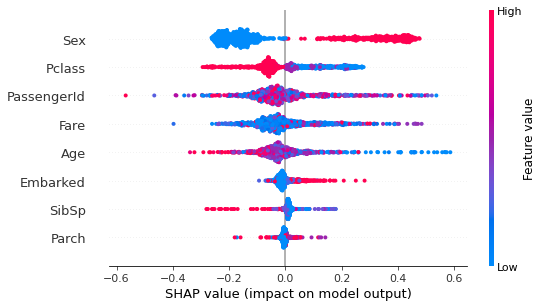

In [217]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

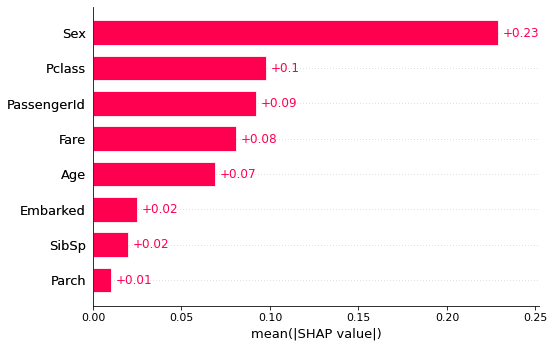

In [222]:
shap.plots.bar(shap_values)

In [227]:
import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model) 
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
No module named 'tensorflow.python.keras.engine.keras_tensor'